# Handwritten Number Recognition (CNN)

In [363]:
import numpy as np
import random
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

## Importing Data

In [364]:
(x_train, y_train) ,(x_test, y_test) = mnist.load_data()

In [365]:
print(
np.shape(x_train),
np.shape(y_train),
np.shape(x_test),
np.shape(y_test), sep = '\n'
    )

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Preprocessing Data

In [366]:
x_train = x_train.reshape(len(x_train), 28, 28, 1)
y_train = y_train.reshape(len(y_train), 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
y_test = y_test.reshape(len(y_test), 1)

In [367]:
print(
np.shape(x_train),
np.shape(y_train),
np.shape(x_test),
np.shape(y_test), sep = '\n'
    )

(60000, 28, 28, 1)
(60000, 1)
(10000, 28, 28, 1)
(10000, 1)


### Normalization

In [368]:
x_train, x_test = x_train/255.0, x_test/255.0

### Image test

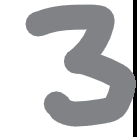

In [369]:
img = image.load_img('three.png')
img

In [370]:
cv2.imread('three.png').shape

(137, 137, 3)

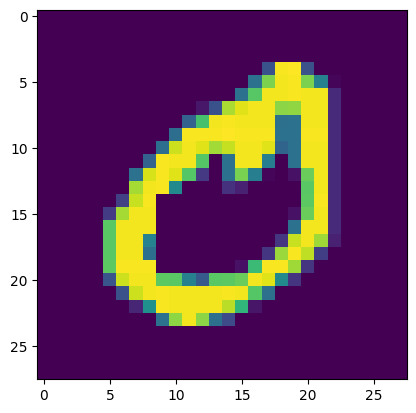

In [371]:
plt.imshow(x_train[21])

## Building Model

In [372]:
model = Sequential()

In [373]:
model.add(Conv2D(32, (3,3), activation='relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

In [374]:
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])

## Training

In [375]:
model.fit(x = x_train, y = y_train, epochs = 7)

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8881 - loss: 0.3550
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9833 - loss: 0.0560
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9885 - loss: 0.0340
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9910 - loss: 0.0280
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9928 - loss: 0.0208
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9954 - loss: 0.0153
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9961 - loss: 0.0122


## Testing

In [376]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9869 - loss: 0.0492


[0.036586515605449677, 0.9901000261306763]

In [377]:
def predict(x):
    plt.imshow(x_train[x])
    arr = model.predict(x_train[x].reshape(1,28,28,1))
    indx = arr.max()
    result = (np.argmax(arr == indx))
    print("Predicted Val:",result)
    print("Actual Val:",y_train[x])

# Play around

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Val: 9
Actual Val: [9]


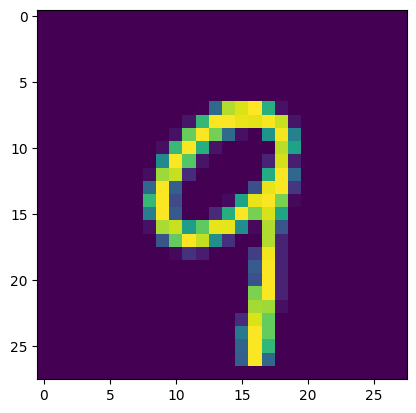

In [411]:
predict(random.randint(0,60000))

In [399]:
def pred(num):
    image = cv2.imread(f'{num}.png')
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize the image to 28x28 pixels
    resized_image = cv2.resize(gray_image, (28, 28))
    # Invert the image colors if necessary
    # MNIST has black digits on white background, invert if your image is white digits on black background
    resized_image = cv2.bitwise_not(resized_image)
    # Normalize the image to range [0, 1]
    normalized_image = resized_image / 255.0
    # Reshape the image to match the input shape expected by the model (1, 28, 28, 1)
    load = normalized_image.reshape(1, 28, 28, 1)
    plt.imshow(normalized_image)
    predicted_class = np.argmax(model.predict(load), axis=1)
    print(f"Predicted class: {predicted_class[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted class: 9


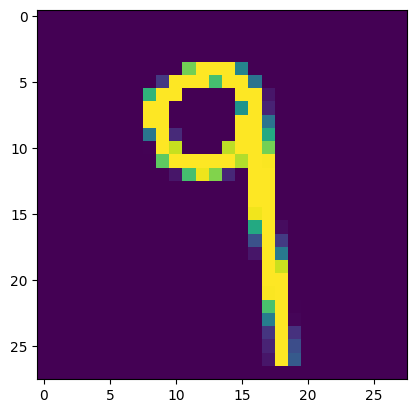

In [413]:
pred('nine')